In [1]:
# run PCA of final spectral data set using the env_eosc510 environement

In [75]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import matplotlib.ticker as ticker


In [3]:
# read in data
data = pd.read_csv('SPOTS_age_norm_across_only.csv', header = 0, index_col = 0)
#data = data[:229] # clipped to remove band bands 
#data = data.drop(['3.36999988556', '16.4799995422','78.5'], axis=1)
data = data.drop(['Q4', 'Q6'], axis=1)
#ages = np.array(data.columns.values.astype(float)) # save ages as an array for plotting
#ages = np.round(ages, 2) # round age array 
#band_names = np.array(data.index.values) # save band names as an array for plotting

# extract ages index for plotting
unit_names = np.array(data.columns.values)
band_names = np.array(data.index.values)

np.shape(data) # check shape, (rows, columns) i.e. (observations, locations/age)
data = data[0:220]

KeyError: "['Q4' 'Q6'] not found in axis"

In [135]:
# read in data
data = pd.read_csv('SPOTS_age_norm_across_only.csv', header = 0, index_col = 0)
#data = data[:229] # clipped to remove band bands 
data = data.drop([ '16.4799995422','78.5', '314.485'], axis=1)

ages = np.array(data.columns.values.astype(float)) # save ages as an array for plotting
ages = np.round(ages, 2) # round age array 
band_names = np.array(data.index.values) # save band names as an array for plotting

# extract ages index for plotting
unit_names = np.array(data.columns.values)
band_names = np.array(data.index.values)
listed_band_names = list(range(0, 234))
 # check shape, (rows, columns) i.e. (observations, locations/age)

data = data.T

#set to 0 for PCA since NA values wont work and dropping will mess up indexing
idx = np.r_[103:109, 152:155,158:160,230:234]
data.iloc[:,idx] = 0
      
print(np.shape(data))

(22, 234)


In [3]:
data_plot = pd.read_csv('SPOTS_age_norm_across_only.csv', header = 0, index_col = 0)
#data = data[:229] # clipped to remove band bands 
data_plot = data_plot.drop(['3.36999988556', '16.4799995422','78.5'], axis = 1)


# check shape, (rows, columns) i.e. (observations, locations/age)

data_plot = data_plot.T

# set NA for plotting
idx = np.r_[103:109, 152:155,158:160,230:234]
data_plot.iloc[:,idx] = np.nan

In [ ]:
data

In [ ]:
plt.legend?

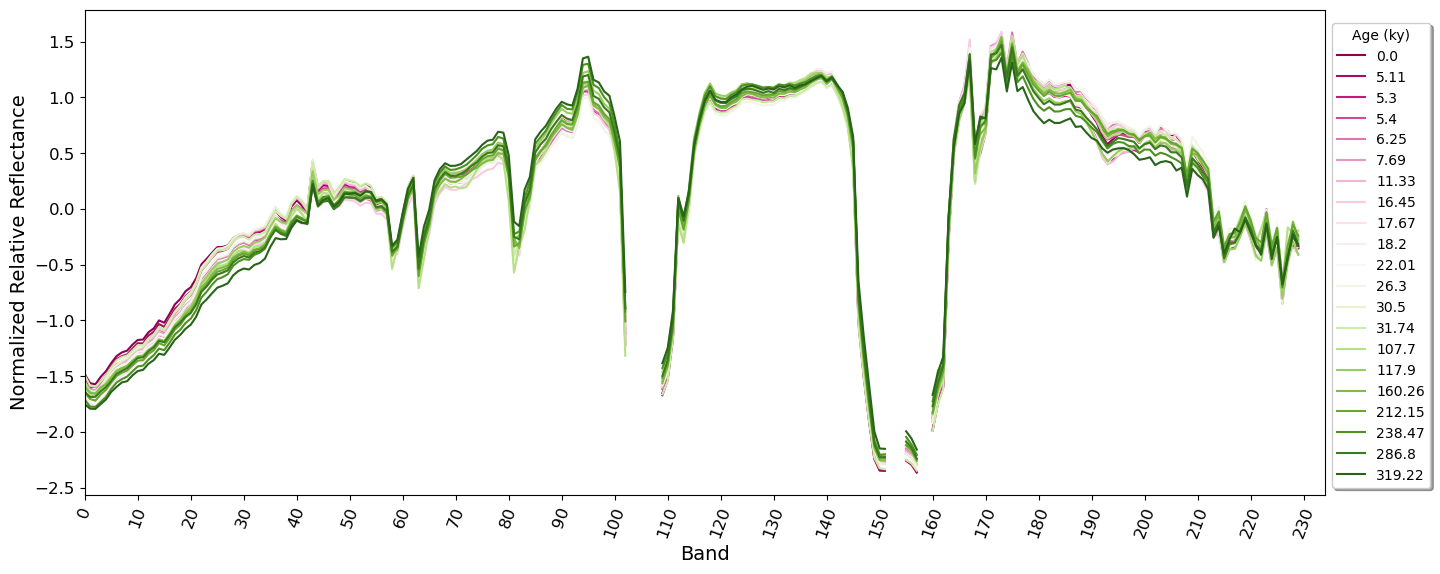

In [77]:
listed_band_names = list(range(0, 234))

target = data_plot
target_names = ages

N = len(target) - 1 # number of objects to plot i.e. color cycle count

plt.rcParams["figure.figsize"] = [16,7] # fig size
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.PiYG(np.linspace(0,1,N))) # colors to cycle through, choose default like 'viridis' or 'PiYG'

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(listed_band_names, target.iloc[i], label = target_names[i]) # for i in range of objects, plot x,y

#plt.legend(loc = 'right')

plt.xlabel('Band', fontsize = 14)
plt.xticks(fontsize = 10, rotation=70, size = 8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('Band')
plt.ylabel('Normalized Relative Reflectance', fontsize = 14)



plt.xlim(0,234)
# cutum legend location
# get legend location
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='lower left', bbox_to_anchor=(1, 0),
          fancybox=True, shadow=True, ncol=1, title = 'Age (ky)')

plt.rcdefaults() # reset global plt parameters, IMPORTANT!
plt.show()

In [43]:
data

,B1_mean,B2_mean,B3_mean,B4_mean,B5_mean,B6_mean,B7_mean,B8_mean,B9_mean,B10_mean,...,B225_mean,B226_mean,B227_mean,B228_mean,B229_mean,B230_mean,B231_mean,B232_mean,B233_mean,B234_mean
0.0,-1.483158,-1.563460,-1.573932,-1.507622,-1.455712,-1.382635,-1.320759,-1.287756,-1.271321,-1.218235,...,-0.401133,-0.258822,-0.776316,-0.355579,-0.221632,-0.294827,0.0,0.0,0.0,0.0
5.1066699028,-1.519162,-1.596394,-1.597488,-1.548922,-1.494748,-1.415555,-1.348117,-1.321309,-1.305488,-1.253340,...,-0.400638,-0.239244,-0.754167,-0.433581,-0.236578,-0.354735,0.0,0.0,0.0,0.0
5.30000019073,-1.538589,-1.624528,-1.637360,-1.577132,-1.522038,-1.453703,-1.396055,-1.370909,-1.355573,-1.299761,...,-0.495742,-0.351299,-0.849360,-0.410373,-0.329219,-0.350595,0.0,0.0,0.0,0.0
5.40000009537,-1.565795,-1.615694,-1.630089,-1.578132,-1.538598,-1.472418,-1.419416,-1.388980,-1.371251,-1.323661,...,-0.413600,-0.232967,-0.715646,-0.434976,-0.187722,-0.341177,0.0,0.0,0.0,0.0
6.25,-1.610373,-1.675203,-1.708043,-1.633640,-1.576705,-1.515977,-1.456131,-1.418626,-1.393958,-1.350653,...,-0.338557,-0.178314,-0.640286,-0.334120,-0.131654,-0.254130,0.0,0.0,0.0,0.0
7.69000005722,-1.555475,-1.620968,-1.631624,-1.581100,-1.538879,-1.473231,-1.413801,-1.387854,-1.364192,-1.314267,...,-0.420353,-0.232419,-0.728998,-0.456788,-0.196379,-0.335590,0.0,0.0,0.0,0.0
11.3299999237,-1.581547,-1.650142,-1.657310,-1.607915,-1.533725,-1.462844,-1.400700,-1.377035,-1.354333,-1.301863,...,-0.502811,-0.360722,-0.827572,-0.397989,-0.346543,-0.403718,0.0,0.0,0.0,0.0
17.6700000763,-1.684097,-1.745323,-1.777243,-1.714720,-1.664461,-1.585772,-1.531457,-1.496097,-1.470807,-1.424327,...,-0.311995,-0.174711,-0.624005,-0.311235,-0.128268,-0.229103,0.0,0.0,0.0,0.0
18.2000007629,-1.584623,-1.686453,-1.702258,-1.648247,-1.595271,-1.527862,-1.464684,-1.440495,-1.425733,-1.376261,...,-0.485304,-0.319919,-0.785496,-0.311797,-0.298610,-0.301854,0.0,0.0,0.0,0.0
22.0100002289,-1.595837,-1.647284,-1.655948,-1.603596,-1.573061,-1.505376,-1.445375,-1.415645,-1.395660,-1.351755,...,-0.353871,-0.170855,-0.671196,-0.431032,-0.132411,-0.288145,0.0,0.0,0.0,0.0


In [136]:
data = data

n_modes = np.min(np.shape(data)) 
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

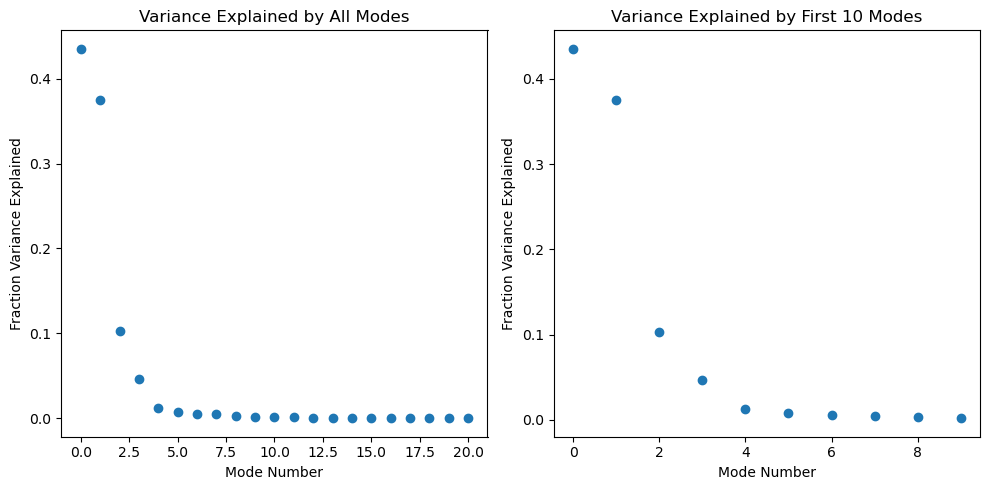

In [79]:
# plot fraction of variance explained by each mode
# pull out ages as array

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

In [166]:
var_exp = fracVar[0] 
var_exp

0.44171918195605264

In [ ]:
len(PCs)


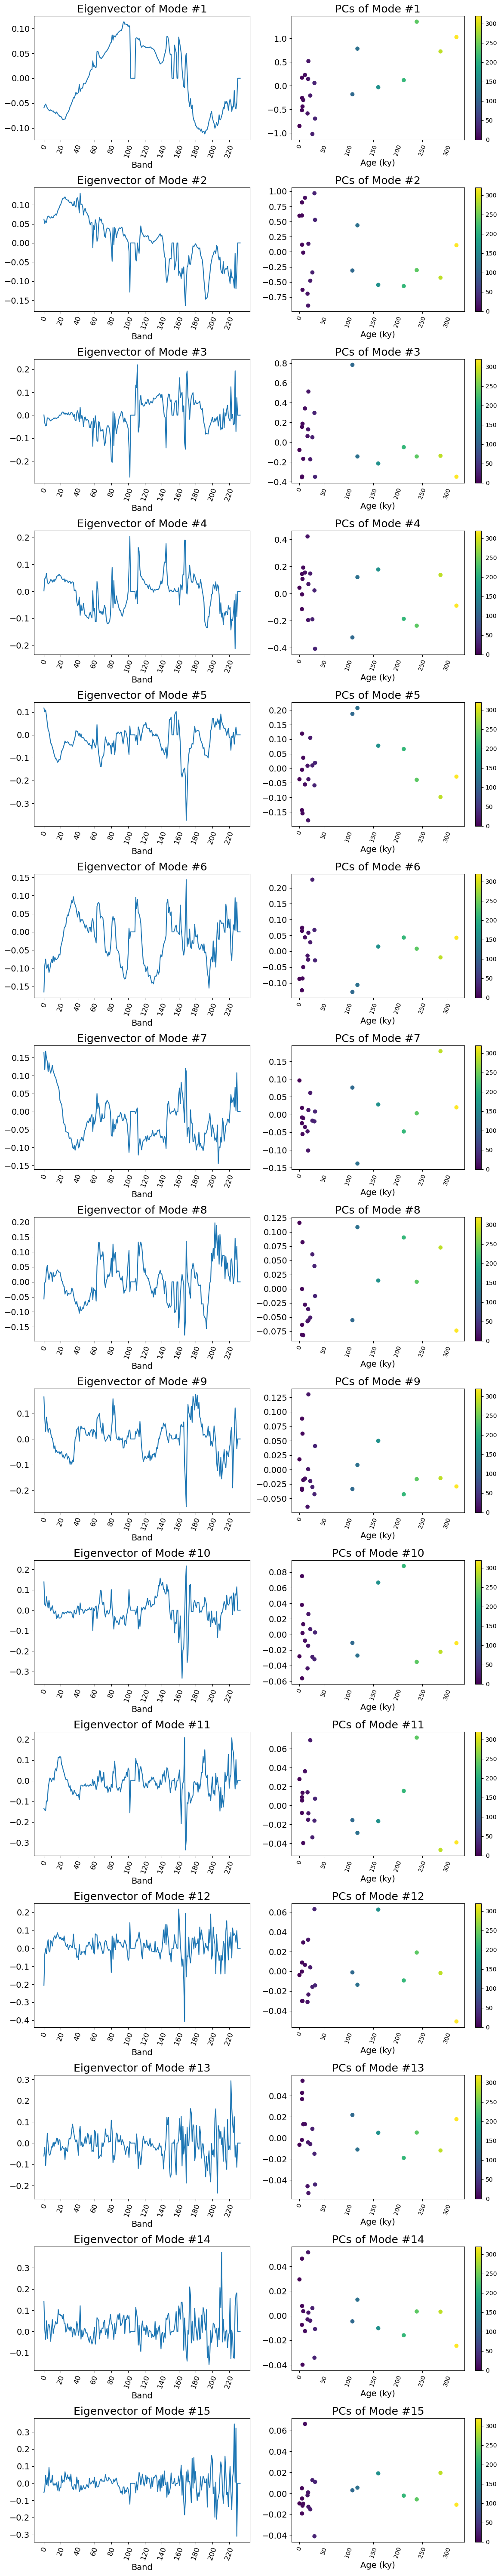

In [80]:
#plot the first n modes and PCs
n = 15

plt.figure(figsize=(12,4*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:]) # extrat ages as an array and do plt.plot(PCs[:,kk], ages)
    plt.title('Eigenvector of Mode #' + str(kk+1), fontsize = 18)
    plt.xlabel('Band', fontsize = 14)
    plt.xticks(np.arange(0, 234, step=20),fontsize = 12, rotation = 70)
    plt.yticks(fontsize = 14)
    
    plt.subplot(n,2,(kk+1)*2)
    #plt.scatter(range(0, len(PCs)),PCs[:,kk]) 
    plt.scatter(ages,PCs[:,kk], c = ages)
    plt.colorbar()
    plt.title('PCs of Mode #' + str(kk+1), fontsize = 18)
    plt.xlabel('Age (ky)', fontsize = 14)
    plt.xticks(fontsize = 14, rotation=70, size = 10)
    plt.yticks(fontsize = 14)
    plt.xlim()
  
    
    plt.tight_layout()
    
    
plt.show()

# yonger fan variation may be due to water on the fans, which effects the signal. Drier fans
# color by location
# invesitgate the PC1, for its age. 

In [ ]:
### Remember that our eigenvectors should be orthogonal and timeseries should be uncorrelated
### Let's check that. Two vectors are orthogonal if their dot product is zero
print(np.dot(eigvecs[0,:],eigvecs[1,:]))
print(np.dot(eigvecs[1,:],eigvecs[2,:]))
print(np.dot(eigvecs[2,:],eigvecs[0,:]))


In [ ]:
### Similarly, we can check the covariance between the timeseries (should be 0)
print(np.cov(PCs[:,0],PCs[:,1])[0,1])
print(np.cov(PCs[:,1],PCs[:,2])[0,1])
print(np.cov(PCs[:,2],PCs[:,0])[0,1])


In [ ]:
plt.scatter(unit_names, data.iloc[19])

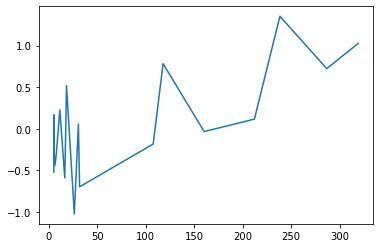

In [32]:
#plt.plot(ages[1:13],PCs[:,4][1:13])
plt.plot(ages[1:21],PCs[:,0][1:21])

In [ ]:
ages

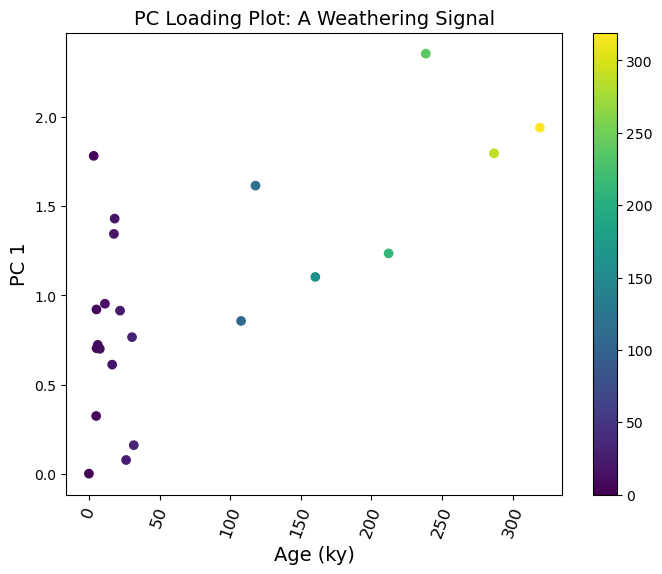

In [137]:
PC1_posative =  PCs[:,0] - PCs[:,0].min()
plt.figure(figsize = (8,6))
plt.scatter(ages,PC1_posative, c = ages)
#plt.plot(ages,PC1_posative, color = 'red', linestyle = '--')
plt.xlabel("Age (ky)", size = 14)
plt.xticks(fontsize = 12, rotation = 70)
plt.ylabel("PC 1", size = 14)
plt.title ("PC Loading Plot: A Weathering Signal", size = 14)
plt.xlim()
plt.colorbar()
#plt.yscale('log')
#plt.xscale('log')





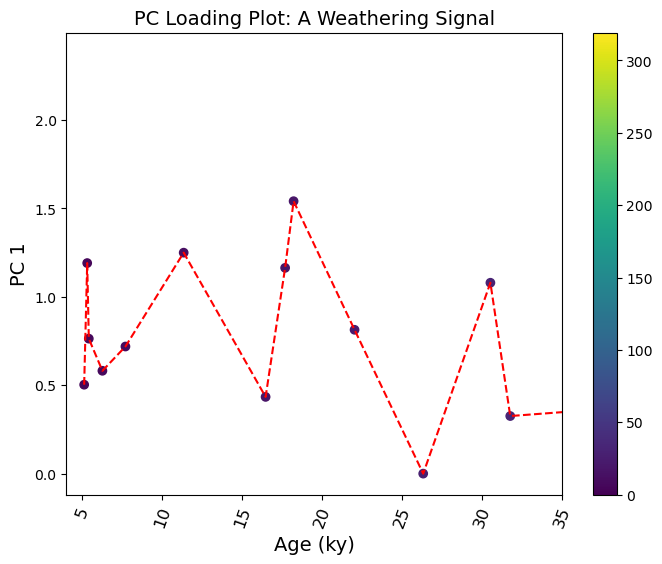

In [108]:
from numpy import linspace, loadtxt, ones, convolve
PC1_posative =  PCs[:,0] - PCs[:,0].min()


def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

x = ages
y = PC1_posative
x_cut = x[1:16]
y_cut = PC1_posative[1:16]


plt.figure(figsize = (8,6))
plt.scatter(x,y, c = ages)
y_av = movingaverage(y_cut, 1)
plt.plot(x_cut, y_av,color = 'red', linestyle = '--')
#plt.scatter(ages[0:100],PC1_posative[0:100], c = ages)
#y_av = movingaverage(y, 2)
#plt.plot(x, y_av,color = 'red', linestyle = '--')
plt.xlabel("Age (ky)", size = 14)
plt.xticks(fontsize = 12, rotation = 70)
plt.ylabel("PC 1", size = 14)
plt.title ("PC Loading Plot: A Weathering Signal", size = 14)
plt.xlim(4,35)
plt.colorbar()
plt.show()

In [ ]:
age_list = ages.astype(list)
plt.scatter(age_list,PCs[:,0])
plt.xlim(0,100)


In [33]:
pca = PCA(n_components= 1)
PCs = pca.fit_transform(data)
#PCs = PCs[[0,6]]
y_rec = pca.inverse_transform(PCs)

In [ ]:
y_rec

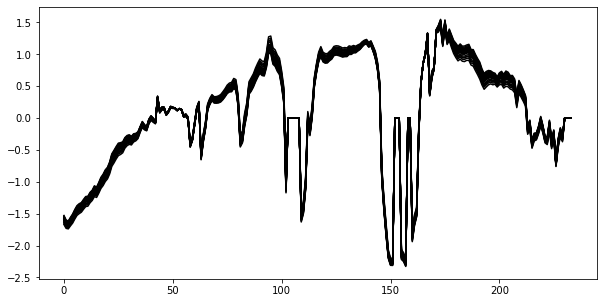

In [34]:
# plot raw normalized data

fig = plt.figure(figsize = (10,5))
#plt.plot(data.T, color = 'red')
#plt.plot(data, color = 'red')
plt.plot(y_rec.T, color = 'black')

plt.show()

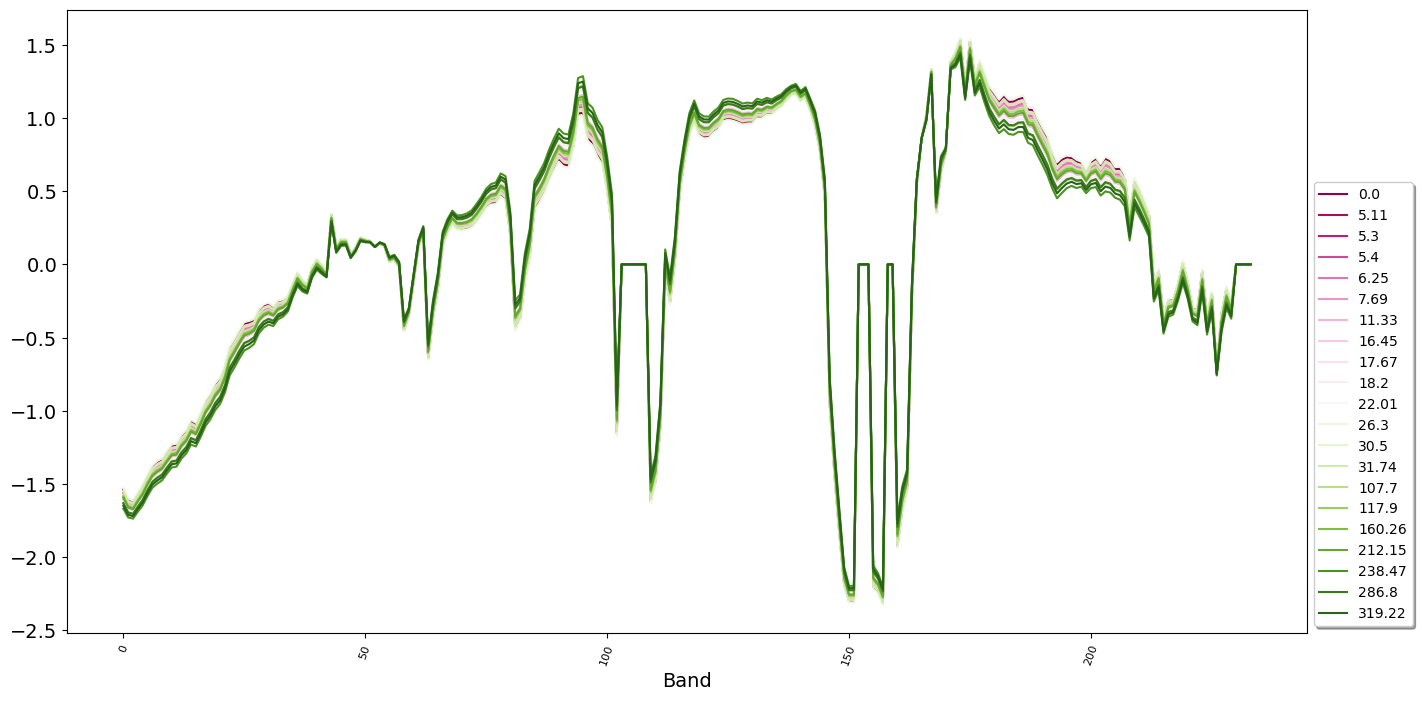

In [57]:
N= 21 # number of objects to plot i.e. color cycle count

plt.rcParams["figure.figsize"] = [16,9] # fig size
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.PiYG(np.linspace(0,1,N))) # colors to cycle through, choose default like 'viridis' or 'PiYG'

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(y_rec[i], label = ages[i]) # for i in range of objects, plot x,y

#plt.legend(loc = 'right')
plt.xlabel('Band', fontsize = 14)
plt.xticks(fontsize = 10, rotation=70, size = 8)
plt.yticks(fontsize = 14)

# cutum legend location
# get legend location
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='lower left', bbox_to_anchor=(1, 0),
          fancybox=True, shadow=True, ncol=1)

plt.rcdefaults() # reset global plt parameters, IMPORTANT!
plt.show()

In [ ]:
PCA.inverse_transform?

In [ ]:
# plot y_rec data
fig = plt.figure(figsize = (10,5))
plt.plot(y_rec.T, color = 'black')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-.1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

In [ ]:
score = PCs
coeff = eigvecs

#Call the function. Use only the 2 PCs.
myplot(PCs[:,0:2],np.transpose(eigvecs[:,108:109]))

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

In [ ]:
target_PC = 0
print(np.min(eigvecs[target_PC]))
print(np.max(eigvecs[target_PC]))

np.argwhere(abs(B) > 0.13)

In [ ]:
len(E)

In [ ]:
k = 3
E = eigvecs[0]
E_array = np.array(E)
#idx = np.argpartition(-E, k)
#C = E[idx[:k]]


print(np.min(E))
print(np.argwhere(E_array == np.min(E)))
print(np.max(E))
print(np.argwhere(E_array == np.max(E)))

specific_vale = .1
print(abs(E_array) > specific_vale)
np.argwhere(abs(E_array) > specific_vale)

#print(eigvecs[0])

In [ ]:
np.where(A > .05)[0][0] 

In [ ]:
band_list = list(data.columns.values)

In [ ]:
# number of components
n_pcs= PCs.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(eigvecs[i]).argmax() for i in range(n_pcs)]
least_important = [np.abs(eigvecs[i]).argmin() for i in range(n_pcs)]

initial_feature_names = list(data.columns.values)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
least_important_names = [initial_feature_names[least_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic_most = {'PC{}_most'.format(i): most_important_names[i] for i in range(n_pcs)}
dic_least = {'PCl{}_least'.format(i): least_important_names[i] for i in range(n_pcs)}

# build the dataframe
most = pd.DataFrame(dic_most.items())
least = pd.DataFrame(dic_least.items())


In [ ]:
most

In [ ]:
least

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]

N = 28
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.PiYG(np.linspace(0,1,N)))

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(norm_same_band_across.T.iloc[i], label = norm_same_band_across.T.index.values.astype(float)[i]) 

#plt.legend(loc = 'right')
plt.xlabel('Band', fontsize = 14)
plt.xticks(fontsize = 10, rotation=70, size = 8)
plt.yticks(fontsize = 14)
    
# get legend location
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='lower left', bbox_to_anchor=(1, 0),
          fancybox=True, shadow=True, ncol=1)

plt.show()

In [ ]:
# PALEOCLIMATE?!

In [900]:
from numpy import linspace, loadtxt, ones, convolve

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# O18 proxy plot
O18 = pd.read_csv('O18_Wang_etal_2007.csv', header = 0)
O18 = O18.rename(columns={'Age (ky B.P.)': "age", 'd18O (per mil, VPDB)': "dO18"})
O18['dO18'] = O18['dO18'] * -1 # inverse the data (so it plots like precip i.e. high value is high precip)
O18.head()

,age,dO18
0,0.42,3.35
1,0.64,3.35
2,0.85,3.51
3,1.06,3.37
4,1.28,3.44


In [893]:
# prep paleoclimate data
max_age = 35  # Ka

ages_fans = ages[ages > 0] # fans with ages > 0 
ages_fans = ages_fans[ages_fans <= max_age] # fans with ages < max age chosen

precip_proxy = O18.loc[O18['age'] >= ages_fans.min()] # paleo data with ages > 0 
precip_proxy = precip_proxy.loc[precip_proxy['age'] <= max_age] # paleo data with ages < max age chosen
ages_proxy = precip_proxy['age']

fans = PCs[:,0][1:len(ages_fans) + 1]

# normalize each dataset
precip_proxy['dO18'] = (precip_proxy['dO18'] - precip_proxy['dO18'].mean())/precip_proxy['dO18'].std()
fans = (fans - fans.mean())/fans.std()

#extract corresponding O18 (y) values @ PC1 ages (PC1 X locations)
precip_proxy_pts = np.interp(ages_fans, precip_proxy['age'], precip_proxy['dO18']) # extract proxy points for every age value 
fans_pts = np.interp(ages_proxy, ages_fans, fans) # extract points for every proxy value



ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 89 and the array at index 1 has size 14

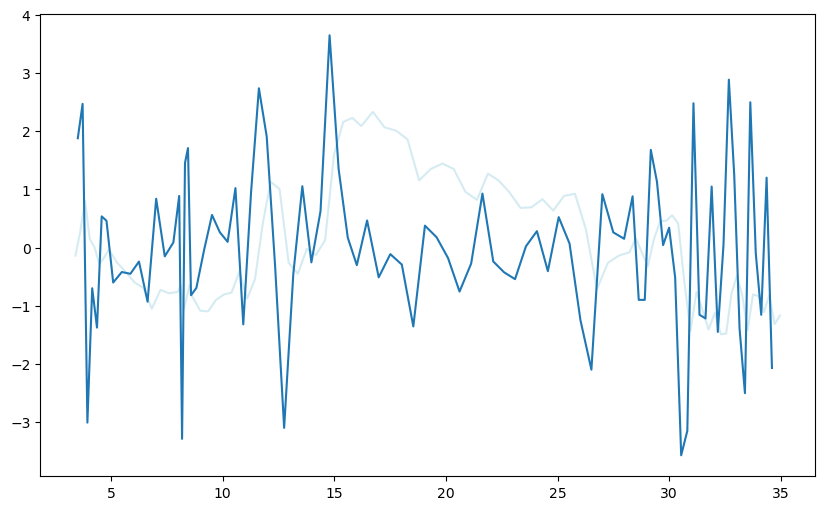

In [901]:
# plot paleoclimate data against PC1
# add moving average, a window of 1 is none
precip_proxy_avg = movingaverage(precip_proxy['dO18'], 10) 
fans_avg = movingaverage(fans, 1)
precip_proxy_pts = np.interp(ages_fans, precip_proxy['age'], precip_proxy_avg) # interpret y values at given x (same shape for r^2)
fan_pts = np.interp(ages_proxy, ages_fans, fans)

# Plot
plt.figure(figsize = (10,6))
#plt.plot(ages_fans, fans_avg, color = 'red', linestyle = '--', label = 'PC1') # raw data
plt.plot(ages_proxy, precip_proxy['dO18'], color = 'lightblue', alpha = 0.5,label = 'Precip. Proxy (d18O), moving average') 
#plt.plot(ages_fans, precip_proxy_pts, color = 'blue', label = 'Precip. Proxy (d18O)')
#plt.plot(precip_proxy['age'], precip_proxy_avg, color = 'purple', linestyle = '--')
plt.plot(x_deriv, y_deriv)

# correlation coefficient (r --> r^2)
x_values = y_deriv
y_values = precip_proxy_pts 

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.title('r^2 = {}'.format(round(r_squared,2)))


In [481]:
# correlation coefficient (r --> r^2)
x_values = fans
y_values = precip_proxy_pts

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.14005208470967484


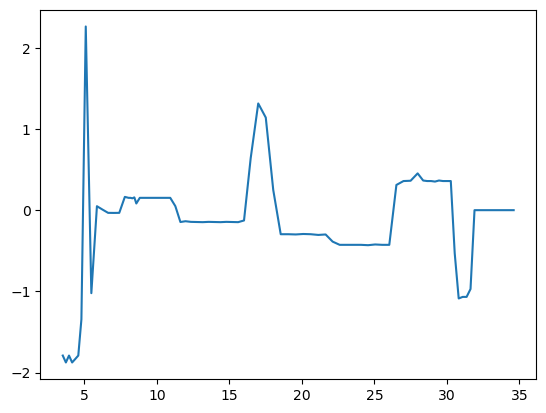

In [639]:
# derivative of weathering rate
# approximate first derivative i.e. slope of line at midpoiont between two points
fan_pts = np.interp(ages_proxy, ages_fans, fans)
y_temp = np.delete(fan_pts, -1)
x_d = (np.array(ages_proxy)[:-1] + np.array(ages_proxy)[1:]) / 2
y_d = np.diff(y_temp) / np.diff(x_d)
x_d = np.delete(x_d, -1)

plt.plot(x_d, y_d)

(3.0, 35.0)

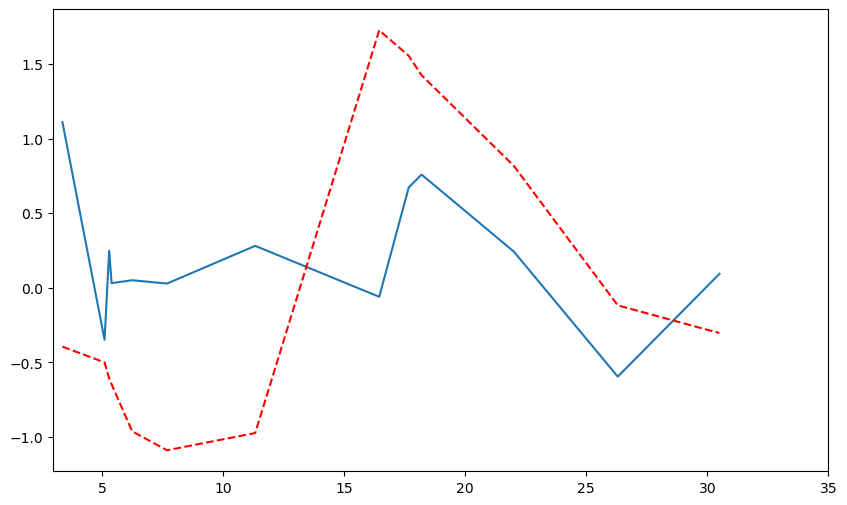

In [311]:
# plot normalized
range_end = 14

x_O18 = O18['age']
y_O18 = O18['dO18']
y_av_O18 = movingaverage(y_O18, 1) # gnerate moving average of proxy data, 1 is none.
y_O18_points = np.interp(ages[1:range_end],x_O18,y_av_O18) #extract corresponding O18 (y) values @ PC1 ages (PC1 X locations)

y_O18_points = y_O18_points - y_O18_points.mean()/y_O18_points.std() # normalize to 0 mean
PC1_norm = PC1[1:range_end] - PC1[1:range_end].mean()/PC1[1:range_end].std() # normalize to 0 mean

plt.figure(figsize = (10,6))
plt.plot(ages[1:range_end], PC1_norm) # raw data
plt.plot(ages[1:range_end], y_O18_points,color = 'red', linestyle = '--') 
#plt.plot(O18['age'],O18['dO18']) # precip proxy

plt.xlim(3,35)

In [ ]:
# plot normalized
range_end = 14

x_O18 = O18['age']
y_O18 = O18['dO18']
y_av_O18 = movingaverage(y_O18, 1) # gnerate moving average of proxy data, 1 is none.
y_O18_points = np.interp(ages[1:range_end],x_O18,y_av_O18) #extract corresponding O18 (y) values @ PC1 ages (PC1 X locations)

y_O18_points = y_O18_points - y_O18_points.mean()/y_O18_points.std() # normalize to 0 mean
PC1_norm = PC1[1:range_end] - PC1[1:range_end].mean()/PC1[1:range_end].std() # normalize to 0 mean

plt.figure(figsize = (10,6))
plt.plot(ages[1:range_end], PC1_norm) # raw data
plt.plot(ages[1:range_end], y_O18_points,color = 'red', linestyle = '--') 
#plt.plot(O18['age'],O18['dO18']) # precip prox

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 13 and the array at index 1 has size 239

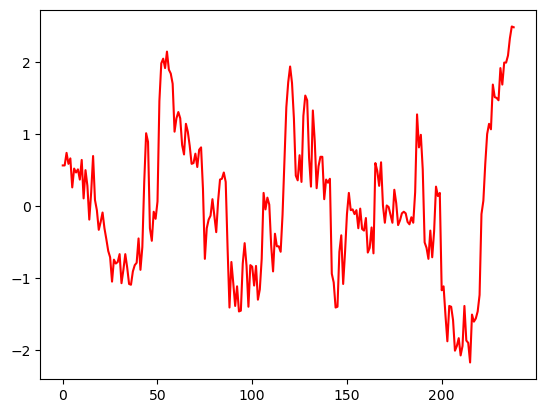

In [284]:
ydata = O18['dO18']
plt.plot(ydata,c="r")

0      0.560283
1      0.560283
2      0.734727
3      0.582088
4      0.658407
         ...   
234    1.988543
235    2.086667
236    2.326528
237    2.490069
238    2.479166
Name: dO18, Length: 239, dtype: float64

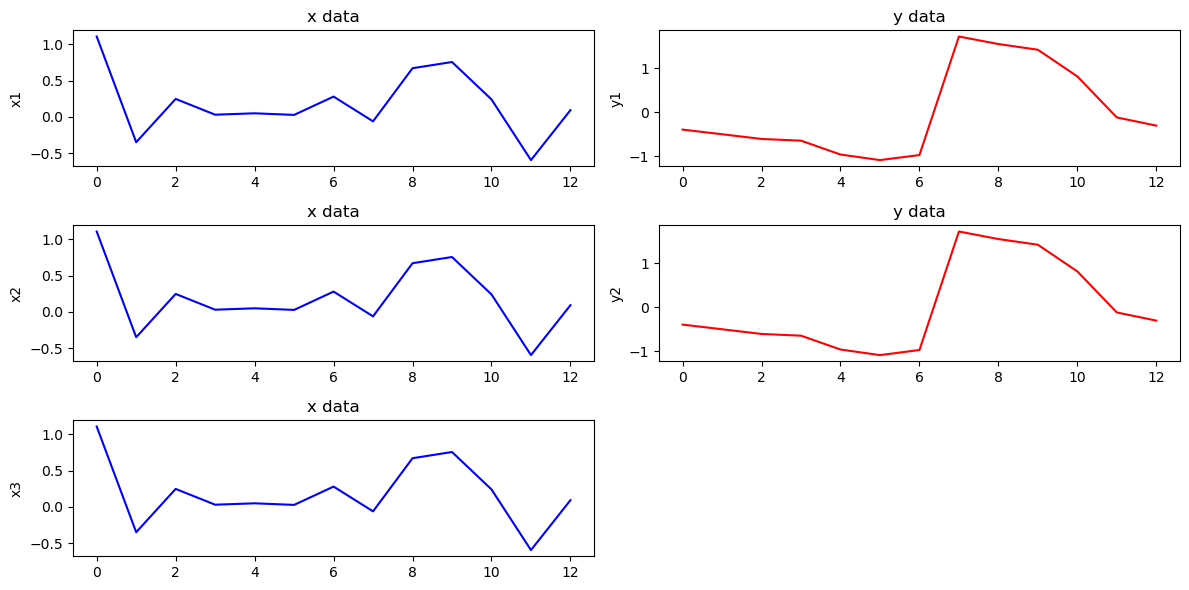

In [294]:
#CCA
from sklearn.cross_decomposition import CCA

xdata = PC1_norm
ydata = y_O18_points

plt.figure(figsize=(12,6))
for i in range(3):
    plt.subplot(3,2,2*i+1)
    plt.title("x data")
    plt.ylabel("x"+str(i+1))
    plt.plot(xdata,c="b")
    if i==2:
        break
    plt.subplot(3,2,2*i+2)
    plt.title("y data")
    plt.ylabel("y"+str(i+1))
    plt.plot(ydata,c="r")
plt.tight_layout()
plt.show()

In [261]:
xdata = xdata.reshape(-1, 1)
ydata = ydata.reshape(-1, 1)
n_modes = 1 #modes to keep
cca = CCA(n_components=n_modes)
cca.fit(xdata, ydata)
X_c, Y_c = ca.transform(xdata, ydata)

np.corrcoef(xdata.T,ydata.T)

array([[1.        , 0.26839563],
       [0.26839563, 1.        ]])

In [684]:
O18_global['dO18']

0       -2.20
5       -2.20
6     -199.00
7     -191.00
8     -181.00
        ...  
412   -999.00
414     -1.76
415   -161.00
416     -1.98
417   -186.00
Name: dO18, Length: 316, dtype: float64

In [1127]:
# long term dO18 record
# prep data
O18_global = pd.read_csv('O18_global_karner2002.csv', header = 0)
O18_global = O18_global.rename(columns={O18_global.columns[0]: "age", O18_global.columns[1]: 'dO18'})
O18_global = O18_global.replace({999:np.NaN})

#O18_global = O18_global.reset_index(drop = True) # reset row index
#O18_global['dO18'] = O18_global['dO18'] * -1 # inverse the data (so it plots like precip i.e. high value is high precip)

In [1131]:
ages_fans = ages[ages > 0] # fans with ages > 0 

ice_proxy = O18_global.loc[O18_global['age'] >= ages_fans.min()] # paleo data with ages > 0 
ice_proxy = ice_proxy.loc[ice_proxy['age'] <= max(ages_fans)] # paleo data with ages < max age chosen
ages_proxy = ice_proxy['age']

fans = PCs[:,0][1:len(ages_fans) + 1]

# normalize each dataset
ice_proxy['dO18'] = (ice_proxy['dO18'] - ice_proxy['dO18'].mean())/ice_proxy['dO18'].std()
fans = (fans - fans.mean())/fans.std()

#extract corresponding O18 (y) values @ PC1 ages (PC1 X locations)
ice_proxy_pts = np.interp(ages_fans, ice_proxy['age'], ice_proxy['dO18']) # extract proxy points for every age value 
fans_pts = np.interp(ages_proxy, ages_fans, fans) # extract points for every proxy value


Text(0.5, 1.0, 'r^2 = 0.11')

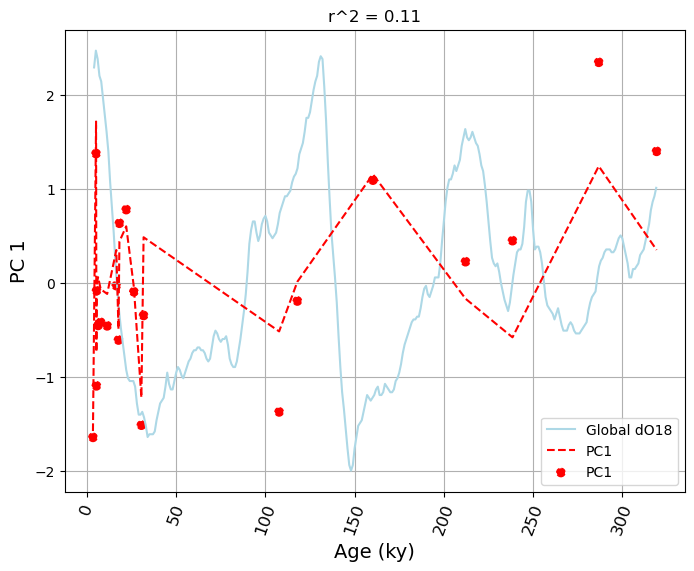

In [1048]:
ice_proxy_avg = movingaverage(ice_proxy['dO18'], 1)
fans_avg = movingaverage(fans, 4)

fans_adjusted = fans - fans_avg

ice_proxy_pts = np.interp(ages_fans, ice_proxy['age'], ice_proxy_avg) # extract proxy points for every age value 
fans_pts = np.interp(ages_proxy, ages_fans, fans_adjusted) # extract points for every proxy value



plt.figure(figsize = (8,6))
plt.plot(ages_proxy, ice_proxy_avg, color = 'lightblue', label = 'Global dO18')
plt.scatter(ages_fans, fans, color = 'red', linestyle = '--', label = 'PC1')
plt.plot(ages_fans, fans_adjusted, color = 'red', linestyle = '--', label = 'PC1')
#plt.plot(ages_fans, precip_proxy['dO18'], color = 'lightblue', alpha = 0.5,label = 'Precip. Proxy (d18O), moving average') 
plt.xlabel("Age (ky)", size = 14)
plt.xticks(fontsize = 12, rotation = 70)
plt.ylabel("PC 1", size = 14)
plt.title ("PC Loading Plot: A Weathering Signal", size = 14)
#plt.colorbar()
plt.xlim()
plt.grid()
plt.legend()


# correlation coefficient (r --> r^2)
x_values = fans_pts
y_values = ice_proxy['dO18']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.title('r^2 = {}'.format(round(r_squared,2)))

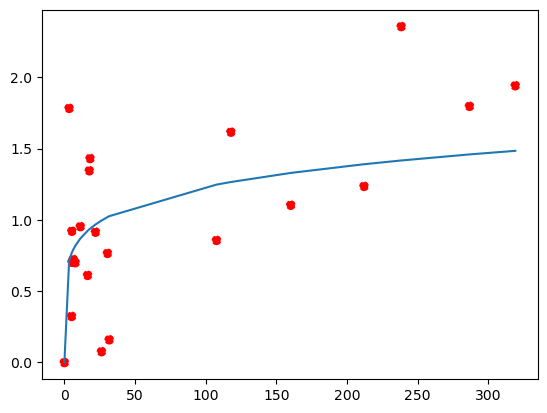

In [1151]:
# calucate weathering curve for point locations based on D'Arcy et al., 2016
# calulate residuals against this curve
# compare against paelo climate proxies
PC1 = PCs[:,0]
PC1_posative = PC1 - PC1.min()

def wr_eq(x):
    m = 0.59
    b = 0.16
    y = m*x**b
    return(y)

# weather rate for from 0:end
fans_for_wr = PC1_posative
wr = wr_eq(ages)

plt.plot(ages, wr)
plt.scatter(ages, fans_for_wr, color = 'red', linestyle = '--', label = 'PC1')



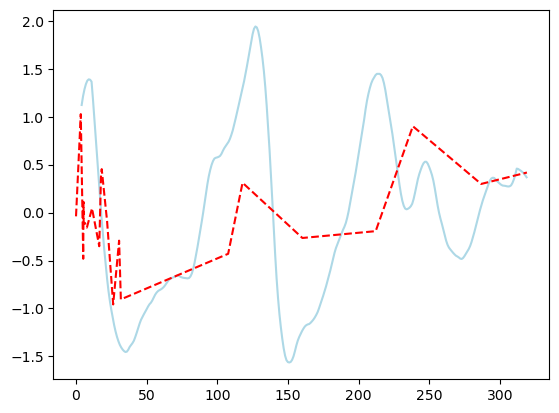

In [1152]:
fans_adjusted = fans_for_wr - wr
fans_adjusted = fans_adjusted - fans_adjusted.mean()/fans_adjusted.std()

ice_proxy_avg = movingaverage(ice_proxy['dO18'], 15)


plt.plot(ages_proxy, ice_proxy_avg, color = 'lightblue', label = 'Global dO18')
plt.plot(ages, fans_adjusted, color = 'red', linestyle = '--', label = 'PC1')
#plt.plot(ages_fans, fans_adjusted, color = 'red', linestyle = '--', label = 'PC1')

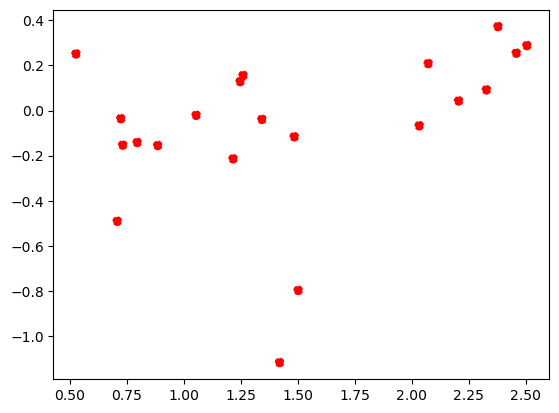

In [1219]:
from sklearn.linear_model import LinearRegression
PC1 = PCs[:,0]
PC1_posative = PC1 - PC1.min()

ages_log = np.log10(ages[1:])
PC1_log = np.log10(PC1_posative[1:])

plt.scatter(ages_log, PC1_log, color = 'red', linestyle = '--', label = 'PC1')

In [1221]:
PC1_log

array([ 0.25109352, -0.49019278, -0.03568267, -0.15288446, -0.14114435,
       -0.15460365, -0.02079378, -0.21358877,  0.12874697,  0.15555731,
       -0.03884362, -1.1161821 , -0.11592245, -0.79647382, -0.06720966,
        0.20841513,  0.04277055,  0.09192249,  0.37222513,  0.25451304,
        0.28806989])

Text(0.5, 1.0, 'Residuals')

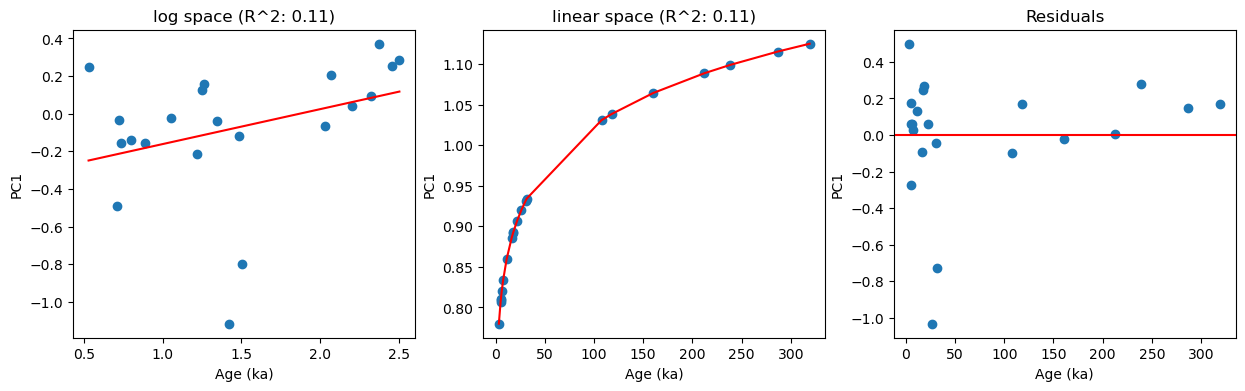

In [1275]:
# take ln of x and y, run linear regression, plot and unpack
import math
from sklearn.metrics import r2_score

# run linear regression
X = ages_log.reshape(-1,1) # values converts it into a numpy array
Y = PC1_log.reshape(-1,1) # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

# calcuilate residuals, unpack from log-log into linear space
residuals = Y - Y_pred
Y_pred_unpacked = np.exp(Y_pred)
X_unpacked = np.exp(X)

# correlation coefficient (r^2)
r2 = r2_score(Y, Y_pred)
r2 = round(r2,2)

# plot results
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('log space (R^2: {})'.format(r2))

plt.subplot(1,3,2)
plt.scatter(ages[1:], Y_pred_unpacked)
plt.plot(ages[1:], Y_pred_unpacked, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('linear space (R^2: {})'.format(r2))

plt.subplot(1,3,3)
plt.scatter(ages[1:], residuals)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))

In [1395]:
# prep paleoclimate data
from numpy import linspace, loadtxt, ones, convolve

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# O18 proxy plot
O18 = pd.read_csv('O18_Wang_etal_2007.csv', header = 0)
O18 = O18.rename(columns={'Age (ky B.P.)': "age", 'd18O (per mil, VPDB)': "dO18"})
O18['dO18'] = O18['dO18'] * -1 # inverse the data (so it plots like precip i.e. high value is high precip)

max_age = 35  # Ka
ages_fans = ages[ages > 0] # fans with ages > 0 
ages_fans = ages_fans[ages_fans <= max_age] # fans with ages < max age chosen

precip_proxy = O18.loc[O18['age'] >= ages_fans.min()] # paleo data with ages > 0 
precip_proxy = precip_proxy.loc[precip_proxy['age'] <= max_age] # paleo data with ages < max age chosen
ages_proxy = precip_proxy['age']

fans = residuals[0:len(ages_fans)]

# normalize each dataset
precip_proxy['dO18'] = (precip_proxy['dO18'] - precip_proxy['dO18'].mean())/precip_proxy['dO18'].std()
fans = (fans - fans.mean())/fans.std()

#extract corresponding O18 (y) values @ PC1 ages (PC1 X locations)
precip_proxy_pts = np.interp(ages_fans, precip_proxy['age'], precip_proxy['dO18']) # extract proxy points for every age value 
#fans_pts = np.interp(ages_proxy, ages_fans, fans) # extract points for every proxy value

(0.0, 32.0)

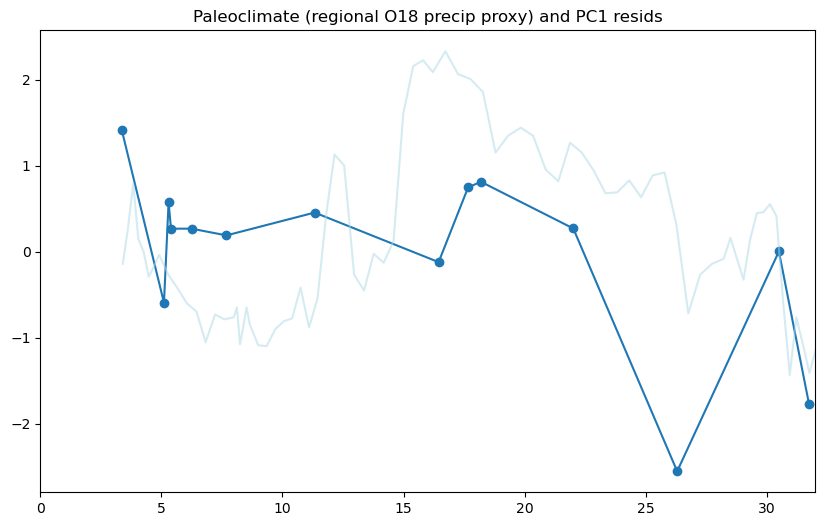

In [1397]:
# Plot
plt.figure(figsize = (10,6))
plt.scatter(ages_fans, fans) # residual data 
plt.plot(ages_fans, fans)
plt.plot(ages_proxy, precip_proxy['dO18'], color = 'lightblue', alpha = 0.5,label = 'Regioanl d18O (precip. proxy)')
plt.title('Paleoclimate (regional O18 precip proxy) and PC1 resids')
plt.xlim(0,32)

In [1399]:
# long term dO18 record
# prep data
O18_global = pd.read_csv('O18_global_karner2002.csv', header = 0)
O18_global = O18_global.rename(columns={O18_global.columns[0]: "age", O18_global.columns[1]: 'dO18'})
O18_global = O18_global.replace({999:np.NaN})

#O18_global = O18_global.reset_index(drop = True) # reset row index
#O18_global['dO18'] = O18_global['dO18'] * -1 # inverse the data (so it plots like precip i.e. high value is high precip)

In [1400]:
ages_fans = ages[ages > 0] # fans with ages > 0 

ice_proxy = O18_global.loc[O18_global['age'] >= ages_fans.min()] # paleo data with ages > 0 
ice_proxy = ice_proxy.loc[ice_proxy['age'] <= max(ages_fans)] # paleo data with ages < max age chosen
ages_proxy = ice_proxy['age']

fans = residuals[0:len(ages_fans) + 1]

# normalize each dataset
ice_proxy['dO18'] = (ice_proxy['dO18'] - ice_proxy['dO18'].mean())/ice_proxy['dO18'].std()
fans = (fans - fans.mean())/fans.std()

#extract corresponding O18 (y) values @ PC1 ages (PC1 X locations)
ice_proxy_pts = np.interp(ages_fans, ice_proxy['age'], ice_proxy['dO18']) # extract proxy points for every age value 
#fans_pts = np.interp(ages_proxy, ages_fans, fans) # extract points for every proxy value


(32.0, 325.0)

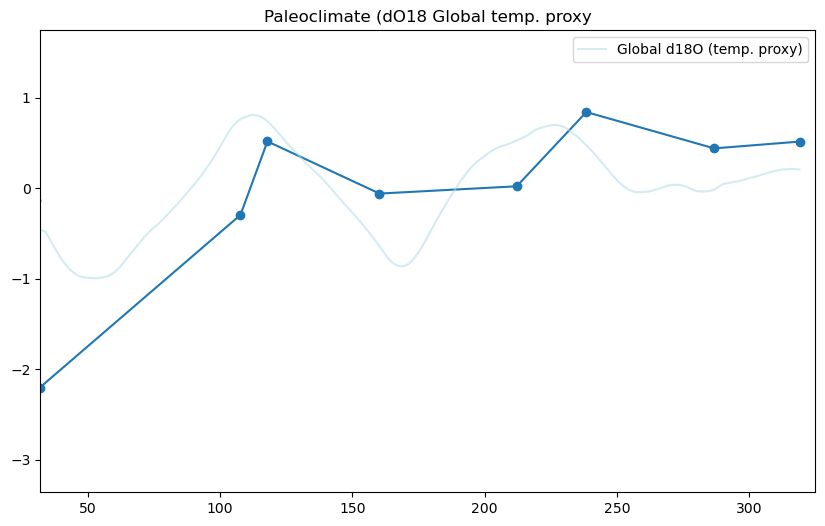

In [1402]:
# Plot
ice_proxy_avg = movingaverage(ice_proxy['dO18'], 60)

plt.figure(figsize = (10,6))
plt.scatter(ages_fans, fans) # residual data 
plt.plot(ages_fans, fans)
plt.plot(ages_proxy, ice_proxy_avg, color = 'lightblue', alpha = 0.5,label = 'Global d18O (temp. proxy)') 
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.legend()

plt.xlim(32, 325)

In [1372]:
(320-35)/8

35.625